In [1]:
import sys
print(sys.path)

['C:\\Users\\harsh\\OneDrive\\Desktop\\UNT Subjects\\NLP', 'C:\\Users\\harsh\\anaconda3\\envs\\tf-gpu\\python38.zip', 'C:\\Users\\harsh\\anaconda3\\envs\\tf-gpu\\DLLs', 'C:\\Users\\harsh\\anaconda3\\envs\\tf-gpu\\lib', 'C:\\Users\\harsh\\anaconda3\\envs\\tf-gpu', '', 'C:\\Users\\harsh\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\Users\\harsh\\anaconda3\\envs\\tf-gpu\\lib\\site-packages', 'C:\\Users\\harsh\\anaconda3\\envs\\tf-gpu\\lib\\site-packages\\win32', 'C:\\Users\\harsh\\anaconda3\\envs\\tf-gpu\\lib\\site-packages\\win32\\lib', 'C:\\Users\\harsh\\anaconda3\\envs\\tf-gpu\\lib\\site-packages\\Pythonwin']


Importing the required libraries

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.probability import ConditionalFreqDist
import docx2txt
import docx
import random
import re
import matplotlib.pyplot as plt

In [3]:

# Open the DOCX file
doc = docx.Document('5 papers related to blockchain.docx')
text = '\n'.join([paragraph.text for paragraph in doc.paragraphs])

# Remove unnecessary punctuations,spaces brackets
text = re.sub(r'\[\d+\]', '', text)
# Remove underscores and hyphens from the sides of words
text = re.sub(r'[-_]', '', text)
# Remove numbers used for points
text = re.sub(r'\d+\.', '', text)
# remove " 
text = re.sub(r'"', '', text)
# remove '
text = re.sub(r"'", '', text)
# remove special characters
text = re.sub(r'[+-.,!@#$%^&<>?/\{}()*_=:;|]', '', text)
# remove multiple spaces
text = re.sub(r'\n\s*\n', '\n', text)
# remove numbers
text = re.sub(r'\s\d+\s', ' ', text)
# remove new line, tabs
text = re.sub(r'\n|\t', ' ', text)
# Remove bullets
text = re.sub(r'^[\s\u2022\u2023\u25E6\u2043]*', '', text, flags=re.MULTILINE)
# remove multiple spaces
text = re.sub(r' +', ' ', text)
text = text.lower()

# Write the cleaned text to a TXT file
with open('input.txt', 'w',encoding="utf-8") as file:
    file.write(text)


File reading starts from here

In [4]:
filename = "input.txt"
with open(filename,encoding="utf-8") as f:
    content = f.readlines()
content = [ line for line in content if line != '\n' ]
content = [ line.lower() for line in content ]

In [5]:
tokens = [t for l in content for t in l.split() ]
# tokens

In [6]:
tl = len(tokens)
tl

9703

Calculating Diversity score of entire data set

In [7]:
# Calculate  unique words
unique_words = set(tokens)
num_unique_words = len(unique_words)

diversity_score = num_unique_words / len(tokens)
print(diversity_score)

0.20807997526538183


In [8]:
freq = nltk.FreqDist(tokens)
probs = {k: v/tl for (k,v) in freq.items()}
pvals = list(probs.values())
cumprobs = {k: sum(pvals[0:ix+1]) for ix, (k,v) in enumerate(probs.items())}

Frequency plot for the generated tokens

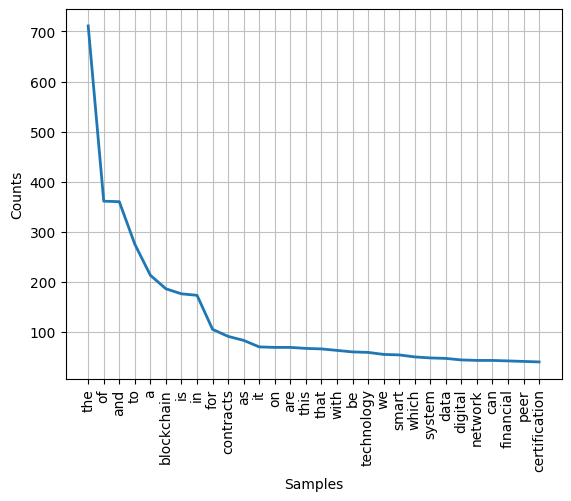

In [9]:
freq.plot(30, cumulative=False)
plt.show()

In [10]:
cfd_bigram = nltk.ConditionalFreqDist(nltk.bigrams(tokens))

Heat map for bigrams with conditional Frequency distribution

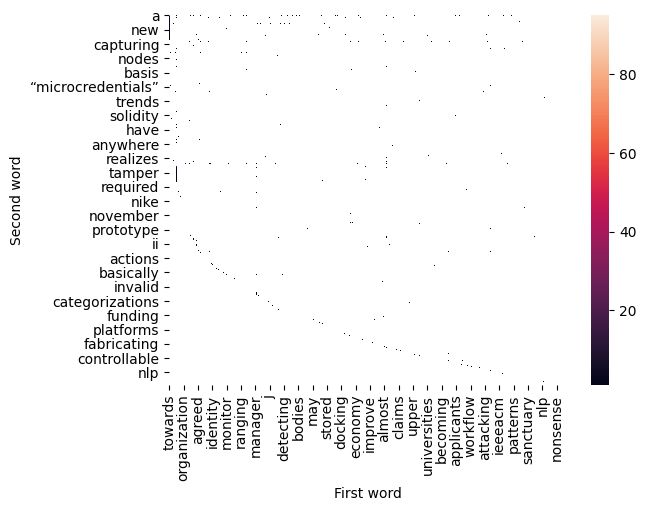

In [11]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(cfd_bigram)

# Create the heatmap
sns.heatmap(df)
plt.xlabel("First word")
plt.ylabel("Second word")
plt.show()


In [12]:
cfd_bigram.items()

dict_items([('towards', FreqDist({'a': 2, 'that': 1, 'the': 1, 'extending': 1})), ('a', FreqDist({'blockchain': 16, 'distributed': 5, 'decentralized': 5, 'user': 5, 'framework': 4, 'lot': 4, 'new': 4, 'timely': 4, 'degree': 4, 'set': 3, ...})), ('framework', FreqDist({'for': 5, 'with': 3, 'which': 1, 'that': 1, 'aims': 1, 'proposition': 1, 'is': 1, 'architecture': 1, 'it': 1, 'from': 1, ...})), ('for', FreqDist({'the': 14, 'a': 4, 'this': 4, 'blockchain': 4, 'which': 4, 'practical': 3, 'token': 3, 'example': 3, 'each': 3, 'understanding': 2, ...})), ('understanding', FreqDist({'the': 2, 'and': 1, 'their': 1})), ('the', FreqDist({'blockchain': 40, 'network': 15, 'most': 15, 'application': 14, 'system': 13, 'same': 12, 'development': 10, 'financial': 9, 'main': 9, 'core': 8, ...})), ('performance', FreqDist({'of': 5, 'the': 2, 'towards': 1, 'bottlenecks': 1, 'and': 1, 'network': 1, 'that': 1, 'certification': 1})), ('of', FreqDist({'the': 95, 'blockchain': 34, 'a': 17, 'smart': 12, 'digi

Calculating perplexity score of bigrams

In [13]:
import math

log_prob_sum = 0
num_tokens = len(tokens)
for i in range(num_tokens - 1):
    w0 = tokens[i]
    w1 = tokens[i+1]
    bigram_count = cfd_bigram[w0][w1]
    bigram_prob = (bigram_count + 1) / (cfd_bigram[w0].N() + len(cfd_bigram[w0]))
    log_prob_sum += math.log2(bigram_prob)

perplexity = math.pow(2, -log_prob_sum / num_tokens)
print(perplexity)


10.965655218617805


Calculating diversity score of bigrams

In [14]:
num_unique_bigrams = len(set(nltk.bigrams(tokens)))
diversity = num_unique_bigrams / len(list(nltk.bigrams(tokens)))
print(diversity)


0.7062461348175634


In [15]:
def generate_bigram_sentence(data):
    # randomly select a starting word
    word = random.choice(list(data.keys()))
    sentence = [word]
    
    # generate the rest of the sentence using bigrams
    for i in range(9):
        if word not in data:
            break
        freq_dist = data[word]
        next_word = freq_dist.most_common(1)[0][0]
        sentence.append(next_word)
        word = next_word
    
    # join the sentence and return
    return " ".join(sentence)

for i in range(5):
    sentence = generate_bigram_sentence(cfd_bigram)
    print("Sentence : ",i+1)
    print(sentence)


Sentence :  1
architecture for the blockchain technology and the blockchain technology and
Sentence :  2
reads data and the blockchain technology and the blockchain technology
Sentence :  3
modules is a blockchain technology and the blockchain technology and
Sentence :  4
though the blockchain technology and the blockchain technology and the
Sentence :  5
faults in the blockchain technology and the blockchain technology and


In [16]:
trigrams = nltk.trigrams(tokens)

In [17]:
condition_pairs = (((w0, w1), w2) for w0, w1, w2 in trigrams)
cfd_trigram = nltk.ConditionalFreqDist(condition_pairs)

Calculating perplexity score of trigrams

In [18]:
trigram_prob = 0.0
for w0_w1, freq_w2 in cfd_trigram.items():
    if '' in w0_w1:
        continue
    for w2 in freq_w2:
        trigram_count = cfd_trigram[w0_w1][w2]
        bigram_count = cfd_bigram[w0_w1[0]][w0_w1[1]]
        trigram_prob *= (trigram_count + 1) / (bigram_count + len(freq))


if trigram_prob == 0.0:
    perplexity = float('inf')
else:
    perplexity = math.pow(2, -1 * (math.log2(trigram_prob)))

print(perplexity)


inf


Calculating diversity score of trigrams

In [19]:
trigrams = list(nltk.trigrams(tokens))
diversity_score = len(set(trigrams)) / len(trigrams)
print(diversity_score)


0.920832903824348


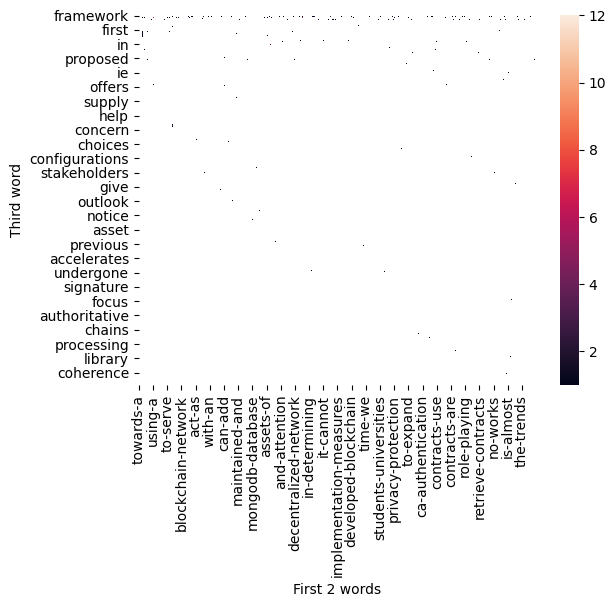

In [20]:
df = pd.DataFrame(cfd_trigram)
sns.heatmap(df)
plt.xlabel("First 2 words")
plt.ylabel("Third word")
plt.show()

In [21]:
cfd_trigram.items()

dict_items([(('towards', 'a'), FreqDist({'framework': 2})), (('a', 'framework'), FreqDist({'for': 4})), (('framework', 'for'), FreqDist({'understanding': 2, 'analyzing': 2, 'capturing': 1})), (('for', 'understanding'), FreqDist({'the': 2})), (('understanding', 'the'), FreqDist({'performance': 2})), (('the', 'performance'), FreqDist({'of': 5})), (('performance', 'of'), FreqDist({'blockchains': 2, 'a': 1, 'blockchain': 1, 'various': 1})), (('of', 'blockchains'), FreqDist({'m': 1, '3rd': 1, 'usage': 1})), (('blockchains', 'm'), FreqDist({'touloupou': 1})), (('m', 'touloupou'), FreqDist({'k': 1})), (('touloupou', 'k'), FreqDist({'christodoulou': 1})), (('k', 'christodoulou'), FreqDist({'a': 1})), (('christodoulou', 'a'), FreqDist({'inglezakis': 1})), (('a', 'inglezakis'), FreqDist({'e': 1})), (('inglezakis', 'e'), FreqDist({'iosif': 1})), (('e', 'iosif'), FreqDist({'and': 1})), (('iosif', 'and'), FreqDist({'m': 1})), (('and', 'm'), FreqDist({'themistocleous': 1})), (('m', 'themistocleous')

In [22]:
def generate_trigram_sentence():
    sentence = []
    # Pick the first word at random
    w0 = random.choice(list(cfd_trigram.keys()))[0]
    sentence.extend([w0])

    # Pick the second word from bigram
    if w0 in cfd_trigram:
        w1 = random.choice(list(cfd_trigram[w0].keys()))
    else:
        # If w0 not present, pick random word from corpus
        w1 = random.choice(tokens)
    sentence.extend([w1])

    # Use those two words to pick the most frequent third word
    if w0 in cfd_trigram and w1 in cfd_trigram[w0]:
        w2 = cfd_trigram[w0][w1].most_common(1)[0][0]
    else:
        # If w0 or w1 not present, picking random word from corpus
        w2 = random.choice(tokens)
    sentence.extend([w2])

    # Iterate until 10 words
    for i in range(7):
        w0, w1, w2 = w1, w2, None
        if w0 in cfd_trigram and w1 in cfd_trigram[w0]:
            w2 = cfd_trigram[w0][w1].most_common(1)[0][0]
        if w2 is None:
            w2 = random.choice(tokens)
        sentence.extend([w2])

    return ' '.join(sentence)

for i in range(5):
    print('Sentence : ',i+1)
    print(generate_trigram_sentence())


Sentence :  1
final developers feasibility institutes the the regulatory digital the at
Sentence :  2
of blockchain generate with not system aspects peer security and
Sentence :  3
brains a development systemic feasible this application controlled a number
Sentence :  4
time questions protocol affect a the industrial database a structure
Sentence :  5
framework popular tremendous incorporating aspects in can to tolerance consensus


In [23]:
quadgrams = nltk.ngrams(tokens,4)

In [24]:
condition_pairs = (((w0, w1, w2), w3) for w0, w1, w2, w3 in quadgrams)
cfd_quadgram = nltk.ConditionalFreqDist(condition_pairs)

Calculating perplexity score of quadgrams

In [25]:
quadgram_prob = 1.0
for w0, w1, w2, w3 in quadgrams:
    trigram_count = cfd_quadgram[(w0, w1, w2)][w3]
    bigram_count = cfd_trigram[(w0, w1)][w2]
    quadgram_prob *= (trigram_count + 1) / (bigram_count + len(freq))
    
perplexity = math.pow(2, -1 * (math.log2(quadgram_prob)))
print(perplexity)

1.0


Calculating diversity score of quadgrams

In [26]:
diversity_score = 0.0
freq_quadgrams = nltk.FreqDist(quadgrams)
unique_quadgrams = set(quadgrams)
if len(freq_quadgrams) > 0 :
    diversity_score = len(unique_quadgrams) / len(freq_quadgrams)
print(diversity_score)

0.0


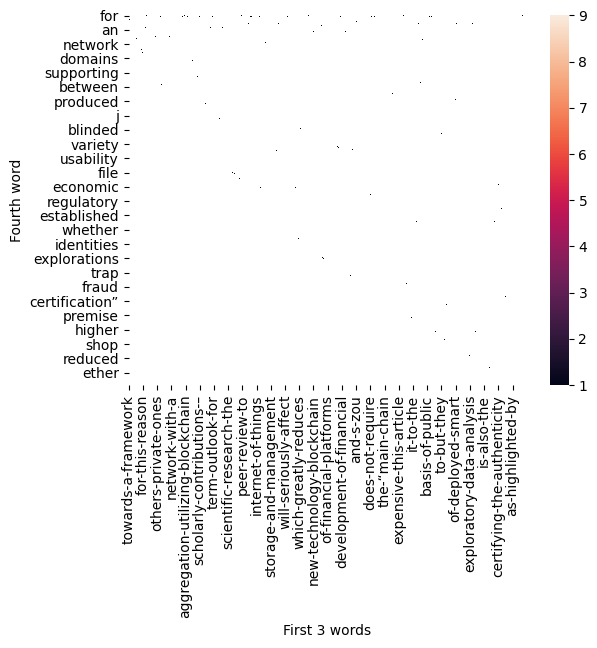

In [27]:
df = pd.DataFrame(cfd_quadgram)

# Create the heatmap
sns.heatmap(df)
plt.xlabel("First 3 words")
plt.ylabel("Fourth word")
plt.show()

In [28]:
cfd_quadgram.items()

dict_items([(('towards', 'a', 'framework'), FreqDist({'for': 2})), (('a', 'framework', 'for'), FreqDist({'understanding': 2, 'analyzing': 2})), (('framework', 'for', 'understanding'), FreqDist({'the': 2})), (('for', 'understanding', 'the'), FreqDist({'performance': 2})), (('understanding', 'the', 'performance'), FreqDist({'of': 2})), (('the', 'performance', 'of'), FreqDist({'blockchains': 2, 'a': 1, 'blockchain': 1, 'various': 1})), (('performance', 'of', 'blockchains'), FreqDist({'m': 1, '3rd': 1})), (('of', 'blockchains', 'm'), FreqDist({'touloupou': 1})), (('blockchains', 'm', 'touloupou'), FreqDist({'k': 1})), (('m', 'touloupou', 'k'), FreqDist({'christodoulou': 1})), (('touloupou', 'k', 'christodoulou'), FreqDist({'a': 1})), (('k', 'christodoulou', 'a'), FreqDist({'inglezakis': 1})), (('christodoulou', 'a', 'inglezakis'), FreqDist({'e': 1})), (('a', 'inglezakis', 'e'), FreqDist({'iosif': 1})), (('inglezakis', 'e', 'iosif'), FreqDist({'and': 1})), (('e', 'iosif', 'and'), FreqDist({

In [29]:
for i in range(5):
    # select random word
    print('Sentence : ',i+1)
    w0, w1, w2 = random.choice(list(cfd_quadgram))

    sentence = [w0, w1, w2]
    
    # Using the conditional frequencies to generate the sentence
    for j in range(7):
        w3_freqdist = cfd_quadgram[(w0, w1, w2)]
        w3 = w3_freqdist.max()
        sentence.append(w3)
        w0, w1, w2 = w1, w2, w3
        
    print(" ".join(sentence))

Sentence :  1
technology and application development white paper blockchain reference framework and
Sentence :  2
produced by the network as well as a connectivity manager
Sentence :  3
with enough cryptocurrency to pay for the user gas costs
Sentence :  4
will not be conducive to the development trend of blockchain
Sentence :  5
have also demonstrated what can be achieved while pushing the
